In [ ]:
import numpy as np
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim
import copy
import matplotlib.pyplot as plt

In [ ]:
batch_size=256
learning_rate=0.001
epochs=100

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
fmnist_train = datasets.FashionMNIST("./", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
fmnist_test = datasets.FashionMNIST("./", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)
fmnist_train, fmnist_val=torch.utils.data.random_split(fmnist_train, [50000, 10000])
fmnist_train[0][0].size()

torch.Size([1, 28, 28])

In [ ]:
dataloader=dict()
dataloader["train"]=DataLoader(fmnist_train, batch_size, shuffle=True)
dataloader["val"]=DataLoader(fmnist_val, batch_size, shuffle=False)
dataloader["test"]=DataLoader(fmnist_test, batch_size, shuffle=False)

In [ ]:
class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.mlp=nn.Sequential(
        nn.Linear(28*28, 100),
        nn.ReLU(),
        nn.Linear(100, 100),
        nn.ReLU(),
        nn.Linear(100, 10)
    )
  def forward(self, x):
    x=x.reshape(-1, 28*28)
    out=self.mlp(x)
    return out

In [ ]:
model=MLP().to(device)
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
best_model=copy.deepcopy(model.state_dict())
best_eval_loss=float('inf')
train_history=[]
eval_history=[]
for epoch in range(epochs):
  for phase in ["train", "val"]:
    if phase=="train":
      model.train()
    else:
      model.eval()
    for x,y in dataloader[phase]:
      x=x.to(device)
      y=y.to(device)
      optimizer.zero_grad()

      output=model(x)
      loss=criterion(output, y)
      
      if phase=="train":
        loss.backward()
        optimizer.step()

    cur_loss=loss.item()
    if phase=="train":
      print(f'Epoch {epoch}/{epochs-1}')
      print(f'train loss: {cur_loss}')
      train_history.append(cur_loss)
    else:
      print(f'val loss: {cur_loss}')
      print()
      eval_history.append(cur_loss)
      if cur_loss<best_eval_loss:
        best_eval_loss=cur_loss
        best_model=copy.deepcopy(model.state_dict())

print(f'Best Validation Loss: {best_eval_loss}')

Epoch 0/99
train loss: 0.4261474609375
val loss: 0.37855076789855957

Epoch 1/99
train loss: 0.46537500619888306
val loss: 0.32793569564819336

Epoch 2/99
train loss: 0.4525553286075592
val loss: 0.3031827211380005

Epoch 3/99
train loss: 0.5729849934577942
val loss: 0.26411545276641846

Epoch 4/99
train loss: 0.3713861405849457
val loss: 0.25917765498161316

Epoch 5/99
train loss: 0.2926814556121826
val loss: 0.2664494812488556

Epoch 6/99
train loss: 0.2563513517379761
val loss: 0.26480329036712646

Epoch 7/99
train loss: 0.25480204820632935
val loss: 0.28245317935943604

Epoch 8/99
train loss: 0.37040042877197266
val loss: 0.22561070322990417

Epoch 9/99
train loss: 0.2772652208805084
val loss: 0.21893619000911713

Epoch 10/99
train loss: 0.49777159094810486
val loss: 0.19252310693264008

Epoch 11/99
train loss: 0.18497800827026367
val loss: 0.20474344491958618

Epoch 12/99
train loss: 0.3344939351081848
val loss: 0.19619932770729065

Epoch 13/99
train loss: 0.3095112442970276
val l

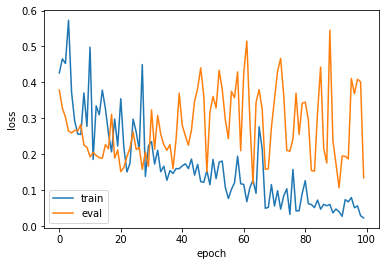

In [ ]:
plt.plot(train_history, label="train")
plt.plot(eval_history, label="eval")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [ ]:
model.load_state_dict(best_model)
total=0
correct=0
with torch.no_grad():
  for x,y in dataloader["test"]:
    x=x.to(device)
    y=y.to(device)

    output=model(x)
    _,pred=torch.max(output.data, 1)
    total+=y.size(0)
    correct+=(pred==y).sum().item()

  print(f'Accuracy: {100*correct/total}')

Accuracy: 87.83
